In [1]:
from google.colab import files
uploaded = files.upload()

Saving Assignment_Data.csv to Assignment_Data.csv
Saving Delivery_Partners_Data.csv to Delivery_Partners_Data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
Assignment_df=pd.read_csv('Assignment_Data.csv')
Delivery_df=pd.read_csv('Delivery_Partners_Data.csv')

In [4]:
Assignment_df

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132389,116618,1273445,2021-03-04 07:07:20.000,2021-03-04 07:37:54.000,0,NaN,2021-03-04 06:55:15.466,2021-03-04 07:42:54.000,404.6,434.6,371.8,3860.0,28,2021-03-04 07:06:25.000,374.0,37.365616,72.835463
132390,116618,234637,2021-03-04 07:05:20.000,2021-03-04 07:07:19.000,1,Type-1,2021-03-04 06:55:15.466,2021-03-04 07:42:54.000,404.6,444.8,371.8,0.0,63,2021-03-04 07:04:40.000,374.0,37.365616,72.835463
132391,118004,1018931,2021-03-04 20:47:34.000,2021-03-04 21:07:35.000,0,NaN,2021-03-04 20:41:54.521,2021-03-04 21:12:35.000,475.7,334.7,413.2,2660.0,8,2021-03-04 20:45:39.000,374.0,37.362292,72.861723
132392,119366,1180245,2021-03-04 23:37:20.000,2021-03-05 00:01:34.000,0,NaN,2021-03-04 23:35:22.194,2021-03-05 00:06:34.000,326.6,392.9,317.7,2260.0,28,2021-03-04 23:37:14.000,374.0,37.365457,72.862098


In [6]:
new_df=Assignment_df.iloc[:,[2,4]]
new_df

,ASSIGNMENT_START_TIME,reject_ind
0,2021-02-13 03:08:24.000,0
1,2021-02-14 05:06:40.000,0
2,2021-02-15 02:22:40.000,0
3,2021-02-15 03:01:25.000,0
4,2021-02-15 03:12:24.000,0
...,...,...
132389,2021-03-04 07:07:20.000,0
132390,2021-03-04 07:05:20.000,1
132391,2021-03-04 20:47:34.000,0
132392,2021-03-04 23:37:20.000,0


In [16]:
a=[1]*new_df.shape[0]
new_df['count']=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
def cln(row):
  a=row['ASSIGNMENT_START_TIME'][:10]
  return a

In [21]:
new_df['ASSIGNMENT_START_TIME']=new_df.apply(lambda row: cln(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
new_df=new_df.groupby(['ASSIGNMENT_START_TIME']).sum()

In [24]:
new_df

,reject_ind,count
ASSIGNMENT_START_TIME,,
2021-02-12,139,1713
2021-02-13,445,5640
2021-02-14,511,6655
2021-02-15,356,6193
2021-02-16,307,5373
2021-02-17,428,5584
2021-02-18,403,7339
2021-02-19,379,6956
2021-02-20,347,5414


In [37]:
a=list(new_df.index)

In [25]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


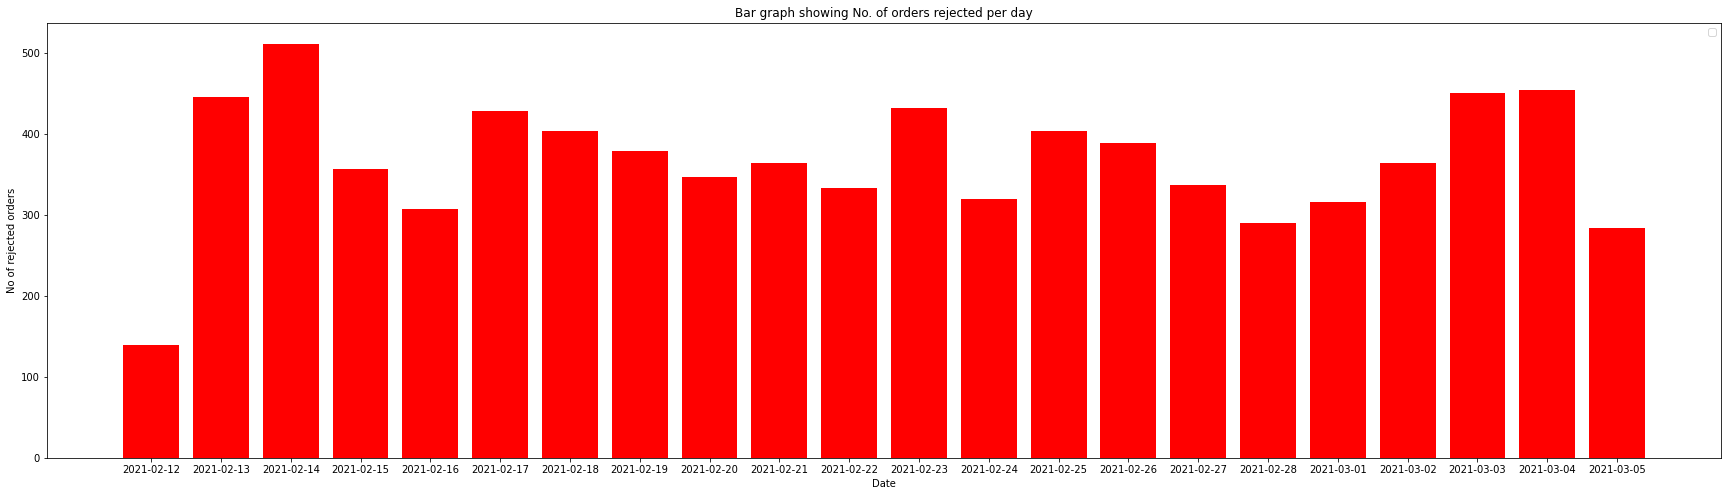

In [42]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
plt.bar(a ,new_df['reject_ind'].values, color='r')
plt.xlabel("Date")
plt.ylabel("No of rejected orders")
plt.title("Bar graph showing No. of orders rejected per day")
plt.legend()
plt.show()

In [43]:
new_df.describe()

,reject_ind,count
count,22.000000,22.000000
mean,365.818182,6017.909091
std,78.115687,1192.222730
min,139.000000,1713.000000
25%,322.500000,5598.000000
50%,364.000000,6062.000000
75%,421.750000,6595.250000
max,511.000000,7774.000000


**We can see that on an average 365.818182	orders are rejected per day wic is approximately 6% of average orders placed per day**

In [5]:
new_df2=Assignment_df[Assignment_df['reject_ind']==1]

In [6]:
new_df2=new_df2.iloc[:,[0,2,3,4]]

In [101]:
new_df2

,ORDER_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind
12,27214,2021-02-17 07:18:39.000,2021-02-17 07:21:39.000,1
38,67253,2021-02-24 05:14:34.000,2021-02-24 05:17:33.000,1
44,81535,2021-02-26 05:26:33.000,2021-02-26 05:30:30.000,1
47,86851,2021-02-27 05:32:33.000,2021-02-27 05:35:33.000,1
56,101742,2021-03-02 02:39:20.000,2021-03-02 02:42:20.000,1
...,...,...,...,...
132288,96558,2021-03-01 02:41:52.000,2021-03-01 03:34:41.034,1
132340,3906,2021-02-13 04:52:40.000,2021-02-13 04:55:42.000,1
132345,23364,2021-02-16 22:20:40.000,2021-02-16 22:52:27.000,1
132386,107834,2021-03-03 03:33:21.000,2021-03-03 03:36:20.000,1


In [3]:
def cal(row):
  a1=int(row['ASSIGNMENT_START_TIME'][11:13])
  b1=int(row['ASSIGNMENT_START_TIME'][14:16])
  c1=int(row['ASSIGNMENT_START_TIME'][17:19])
  a2=int(row['ASSIGNMENT_END_TIME'][11:13])
  b2=int(row['ASSIGNMENT_END_TIME'][14:16])
  c2=int(row['ASSIGNMENT_END_TIME'][17:19])
  z1=a1*3600 + b1*60 +c1
  z2=a2*3600 + b2*60 +c2
  # print(z1)
  if z1<=z2:
    return z2-z1
  return 3600*24-z1+z2 

In [103]:
new_df2['delay_time']=new_df2.apply(lambda row: cal(row), axis=1)
new_df2

,ORDER_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,delay_time
12,27214,2021-02-17 07:18:39.000,2021-02-17 07:21:39.000,1,180
38,67253,2021-02-24 05:14:34.000,2021-02-24 05:17:33.000,1,179
44,81535,2021-02-26 05:26:33.000,2021-02-26 05:30:30.000,1,237
47,86851,2021-02-27 05:32:33.000,2021-02-27 05:35:33.000,1,180
56,101742,2021-03-02 02:39:20.000,2021-03-02 02:42:20.000,1,180
...,...,...,...,...,...
132288,96558,2021-03-01 02:41:52.000,2021-03-01 03:34:41.034,1,3169
132340,3906,2021-02-13 04:52:40.000,2021-02-13 04:55:42.000,1,182
132345,23364,2021-02-16 22:20:40.000,2021-02-16 22:52:27.000,1,1907
132386,107834,2021-03-03 03:33:21.000,2021-03-03 03:36:20.000,1,179


In [82]:
new_df2.describe()

,reject_ind,delay_time
count,8048.0,8048.000000
mean,1.0,464.438743
std,0.0,604.874725
min,1.0,6.000000
25%,1.0,179.000000
50%,1.0,180.000000
75%,1.0,561.000000
max,1.0,5462.000000


In [104]:
new_df2=new_df2.iloc[:,[0,4]]

In [105]:
new_df2=new_df2.groupby(['ORDER_ID']).sum()

In [107]:
new_df2.describe()

,delay_time
count,5944.000000
mean,628.836306
std,1007.221166
min,7.000000
25%,179.000000
50%,180.000000
75%,650.000000
max,10228.000000


**We can see that on an average 628	seconds of delay per order is wasted in delay time.We can see the max time delay is 10228 seconds
which is about 2hrs and 50 mins which is not good for the brand reputation for swiggy which promises to deliver food on time**

In [7]:
feature_df=Assignment_df.iloc[:,[1,2,4,8,9,10,12,14,15,16]]

In [8]:
feature_df.head()

,DE_ID,ASSIGNMENT_START_TIME,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,180976,2021-02-13 03:08:24.000,0,320.9,320.0,314.0,63,373.0,37.377569,72.832560
1,280243,2021-02-14 05:06:40.000,0,516.8,342.5,451.0,27,373.0,37.380613,72.796909
2,339813,2021-02-15 02:22:40.000,0,459.5,418.7,443.0,57,373.0,37.372032,72.805871
3,1315348,2021-02-15 03:01:25.000,0,376.4,332.9,367.3,41,373.0,37.371380,72.819992
4,1186729,2021-02-15 03:12:24.000,0,414.5,334.1,413.2,13,373.0,37.369925,72.826764


**I have taken only those features which are known before delivery is completed.By these features I will try to predict whether the delivery executive assigned will reject the delivery or not so we can know in advance to wich DE the task should be assigned.Later I will add some new feature**

In [9]:
new_df3=Assignment_df.iloc[:,[1,4]]

In [10]:
a=[1]*new_df3.shape[0]
new_df3['count']=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
new_df3=new_df3.groupby(['DE_ID']).sum()
new_df3

,reject_ind,count
DE_ID,,
220,23,223
21914,2,262
21984,6,209
23094,10,167
83763,5,170
...,...,...
1356287,1,41
1357090,0,3
1374346,0,21


In [12]:
s1=list(new_df3.index)
s2=new_df3['reject_ind'].values
s3=new_df3['count'].values

In [13]:
s4=list()
s5=list()
dic=dict()
for i in range(0,len(s1)):
  dic[s1[i]]=(s2[i],s3[i])

In [14]:
s6=feature_df['DE_ID'].values

In [15]:
for i in range(0,len(s6)):
  s4.append(dic[s6[i]][0])
  s5.append(dic[s6[i]][1])

In [16]:
feature_df['reject_ind_count']=s4
feature_df['count']=s5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
feature_df.head()

,DE_ID,ASSIGNMENT_START_TIME,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,reject_ind_count,count
0,180976,2021-02-13 03:08:24.000,0,320.9,320.0,314.0,63,373.0,37.377569,72.832560,2,247
1,280243,2021-02-14 05:06:40.000,0,516.8,342.5,451.0,27,373.0,37.380613,72.796909,1,179
2,339813,2021-02-15 02:22:40.000,0,459.5,418.7,443.0,57,373.0,37.372032,72.805871,4,320
3,1315348,2021-02-15 03:01:25.000,0,376.4,332.9,367.3,41,373.0,37.371380,72.819992,17,201
4,1186729,2021-02-15 03:12:24.000,0,414.5,334.1,413.2,13,373.0,37.369925,72.826764,62,481


In [18]:
def cal2(row):
  a1=int(row['ASSIGNMENT_START_TIME'][11:13])
  b1=int(row['ASSIGNMENT_START_TIME'][14:16])
  c1=int(row['ASSIGNMENT_START_TIME'][17:19])
  z1=a1*3600 + b1*60 +c1
  return z1

In [19]:
feature_df['ASSIGNMENT_START_TIME']=feature_df.apply(lambda row: cal2(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
feature_df

,DE_ID,ASSIGNMENT_START_TIME,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,reject_ind_count,count
0,180976,11304,0,320.9,320.0,314.0,63,373.0,37.377569,72.832560,2,247
1,280243,18400,0,516.8,342.5,451.0,27,373.0,37.380613,72.796909,1,179
2,339813,8560,0,459.5,418.7,443.0,57,373.0,37.372032,72.805871,4,320
3,1315348,10885,0,376.4,332.9,367.3,41,373.0,37.371380,72.819992,17,201
4,1186729,11544,0,414.5,334.1,413.2,13,373.0,37.369925,72.826764,62,481
...,...,...,...,...,...,...,...,...,...,...,...,...
132389,1273445,25640,0,404.6,434.6,371.8,28,374.0,37.365616,72.835463,3,188
132390,234637,25520,1,404.6,444.8,371.8,63,374.0,37.365616,72.835463,20,400
132391,1018931,74854,0,475.7,334.7,413.2,8,374.0,37.362292,72.861723,29,240
132392,1180245,85040,0,326.6,392.9,317.7,28,374.0,37.365457,72.862098,13,245


In [21]:
Delivery_df

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,141533,06:42,37.390427,72.849424,2019-09-20,372
1,235942,08:42,37.372289,72.885341,2020-03-15,372
2,973234,06:42,37.410268,72.853610,2018-12-21,375
3,973473,05:42,37.397067,72.872533,2018-12-21,624
4,1016546,06:42,37.425545,72.895137,2019-01-11,668
...,...,...,...,...,...,...
986,362691,05:42,37.374788,72.861131,2020-08-14,372
987,369684,06:42,37.365671,72.861327,2020-08-21,374
988,395572,06:42,37.399884,72.874896,2020-09-15,624
989,1180245,01:42,37.380950,72.865009,2019-04-01,372


In [22]:
dic=dict()
for i in range(0,Delivery_df.shape[0]):
  dic[Delivery_df['DE_ID'][i]]=(Delivery_df['SHIFT_END_TIME'][i],Delivery_df['DE_HOME_LAT'][i],Delivery_df['DE_HOME_LNG'][i],Delivery_df['DE_ZONE_ID'][i])
     

In [23]:
de_end=list()
de_lat=list()
de_lng=list()
de_zone=list()
for i in range(0,len(s6)):
  de_end.append(dic[s6[i]][0])
  de_lat.append(dic[s6[i]][1])
  de_lng.append(dic[s6[i]][2])
  de_zone.append(dic[s6[i]][3])

In [24]:
feature_df['de_end']=de_end
feature_df['de_lat']=de_lat
feature_df['de_lng']=de_lng
feature_df['de_zone']=de_zone

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
feature_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
feature_df

,DE_ID,ASSIGNMENT_START_TIME,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,reject_ind_count,count,de_end,de_lat,de_lng,de_zone
0,180976,11304,0,320.9,320.0,314.0,63,373.0,37.377569,72.832560,2,247,05:42,37.374634,72.871986,373
1,280243,18400,0,516.8,342.5,451.0,27,373.0,37.380613,72.796909,1,179,06:42,37.377694,72.850738,372
2,339813,8560,0,459.5,418.7,443.0,57,373.0,37.372032,72.805871,4,320,05:42,37.395456,72.872473,372
3,1315348,10885,0,376.4,332.9,367.3,41,373.0,37.371380,72.819992,17,201,06:42,37.422797,72.824708,372
4,1186729,11544,0,414.5,334.1,413.2,13,373.0,37.369925,72.826764,62,481,05:42,37.386463,72.854589,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132389,1273445,25640,0,404.6,434.6,371.8,28,374.0,37.365616,72.835463,3,188,11:42,37.394628,72.782704,372
132390,234637,25520,1,404.6,444.8,371.8,63,374.0,37.365616,72.835463,20,400,05:42,37.422587,72.838379,375
132391,1018931,74854,0,475.7,334.7,413.2,8,374.0,37.362292,72.861723,29,240,05:42,37.352210,72.897939,372
132392,1180245,85040,0,326.6,392.9,317.7,28,374.0,37.365457,72.862098,13,245,01:42,37.380950,72.865009,372


In [27]:
def cal3(row):
  a1=int(row['de_end'][0:2])
  b1=int(row['de_end'][3:5])
  z1= a1*3600 + b1*60
  return z1

In [28]:
feature_df['de_end']=feature_df.apply(lambda row: cal3(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
def abs_lat(row):
  z1=abs(row['CUSTOMER_LAT']-row['de_lat'])
  return z1
def abs_lng(row):
  z1=abs(row['CUSTOMER_LNG']-row['de_lng'])
  return z1

In [30]:
feature_df['abs_lat']=feature_df.apply(lambda row: abs_lat(row), axis=1)
feature_df['abs_lng']=feature_df.apply(lambda row: abs_lng(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
feature_df

,DE_ID,ASSIGNMENT_START_TIME,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,reject_ind_count,count,de_end,de_lat,de_lng,de_zone,abs_lat,abs_lng
0,180976,11304,0,320.9,320.0,314.0,63,373.0,37.377569,72.832560,2,247,20520,37.374634,72.871986,373,0.002935,0.039426
1,280243,18400,0,516.8,342.5,451.0,27,373.0,37.380613,72.796909,1,179,24120,37.377694,72.850738,372,0.002920,0.053829
2,339813,8560,0,459.5,418.7,443.0,57,373.0,37.372032,72.805871,4,320,20520,37.395456,72.872473,372,0.023424,0.066602
3,1315348,10885,0,376.4,332.9,367.3,41,373.0,37.371380,72.819992,17,201,24120,37.422797,72.824708,372,0.051417,0.004717
4,1186729,11544,0,414.5,334.1,413.2,13,373.0,37.369925,72.826764,62,481,20520,37.386463,72.854589,372,0.016538,0.027824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132389,1273445,25640,0,404.6,434.6,371.8,28,374.0,37.365616,72.835463,3,188,42120,37.394628,72.782704,372,0.029012,0.052759
132390,234637,25520,1,404.6,444.8,371.8,63,374.0,37.365616,72.835463,20,400,20520,37.422587,72.838379,375,0.056971,0.002916
132391,1018931,74854,0,475.7,334.7,413.2,8,374.0,37.362292,72.861723,29,240,20520,37.352210,72.897939,372,0.010082,0.036217
132392,1180245,85040,0,326.6,392.9,317.7,28,374.0,37.365457,72.862098,13,245,6120,37.380950,72.865009,372,0.015493,0.002911


In [32]:
y=feature_df['reject_ind'].values
X=feature_df.iloc[:,[1,3,4,5,6,7,10,11,12,15,16,17]].values

In [107]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [162]:
# train_y=train_y.reshape(-1, 1)

In [118]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.fit_transform(test_X)

In [36]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [40]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
Model=XGBClassifier(max_depth=25,learning_rate=0.1,min_child_weight=1,subsample=0.65,n_estimators=150)
Model.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.65, verbosity=1)

In [146]:
pred_y=Model.predict(test_X)

In [93]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21486
           1       0.85      0.28      0.42      1260

    accuracy                           0.96     22746
   macro avg       0.90      0.64      0.70     22746
weighted avg       0.95      0.96      0.95     22746



0 class is for accepted orders and 1 is for rejected

**I have applied a model that tries to predict whether a DE will reject the order or not. Now we can avoid rejection of orders by checking in advance. We can give order to the DE who accepts the order with most probability. Probability Can be calculated by predict_proba().**

# Challenges with model
**If we check by bruteforce every DE to calculate max probability it can take time.
To solve this we can set a cutoff, first DE above this cutoff is assigned the order.**
